In [1]:
#导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False
bank_data = pd.read_csv('bank_data.csv',index_col=None)

# 1.数据集质量评估

In [2]:
#查看数据
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#查看数据类型
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [4]:
#查看数据的缺失情况
bank_data.isnull().sum()
#从结果中可以看到数据并没有缺失值

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 2.对数据进行统计分析，该数据集进行描述（数据分布，数值范围等）

In [5]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


# 3.数据集双边之间彼此关联关系

In [7]:
#查看age和housing之间的关系
bank_data[['age','housing']].corr()

,age
age,1.0


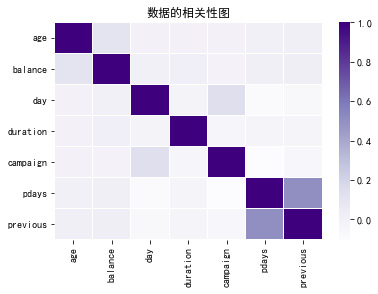

In [8]:
#画出整个数据的相关性图
data = bank_data.corr()
sns.heatmap(data,cmap="Purples",linewidths = 0.1)
plt.title("数据的相关性图")
plt.show()

In [9]:
# 不同年龄段的平均账户余额
bank_data[['age','balance']].groupby('age').mean()

,balance
age,
18,237.000000
19,283.153846
20,1013.200000
21,1064.200000
22,844.979167
23,970.676471
24,1473.936842
25,963.077381
26,1187.646809


In [10]:
# 不同婚姻状况的平均账户余额
bank_data[['marital','balance']].groupby('marital').mean()

,balance
marital,
divorced,1371.835267
married,1599.927570
single,1457.255259


In [11]:
#不同婚姻状况下的存款情况
bank_data[['marital','deposit']].groupby('marital')

In [12]:
# 职业分组下的账户余额均值
bank_data[['job','balance']].groupby('job').mean()

,balance
job,
admin.,1195.866567
blue-collar,1203.926440
entrepreneur,1621.942073
housemaid,1366.160584
management,1793.663679
retired,2417.250643
self-employed,1865.372840
services,1081.171181
student,1500.783333


In [13]:
# 有无贷款的年龄均值
bank_data[['loan','age']].groupby('loan').mean()

,age
loan,
no,41.377139
yes,40.267123


In [14]:
# 有贷款的年龄统计分析
loan=bank_data['age'][bank_data['loan']=="yes"]
loan.describe().T

count    1460.000000
mean       40.267123
std         9.775752
min        20.000000
25%        32.000000
50%        39.000000
75%        48.000000
max        72.000000
Name: age, dtype: float64

## 根据职业进行贷款人数或者贷款比例的统计

In [15]:
temp = bank_data[['job','loan']]
loan_num = temp[temp['loan'] == 'yes'].groupby('job').count()
job_sum = temp.groupby('job').count()
loan_sum_rate = pd.merge(loan_num, job_sum, how='left', on='job')
loan_sum_rate.columns = ['loan_num', 'sum_num']
loan_sum_rate['loan_sum_rate'] = loan_sum_rate['loan_num'] / loan_sum_rate['sum_num']
loan_sum_rate

,loan_num,sum_num,loan_sum_rate
job,,,
admin.,236,1334,0.176912
blue-collar,337,1944,0.173354
entrepreneur,70,328,0.213415
housemaid,20,274,0.072993
management,260,2566,0.101325
retired,55,778,0.070694
self-employed,56,405,0.138272
services,154,923,0.166847
student,1,360,0.002778


## 根据住房状态进行贷款人数和贷款比例的统计

In [16]:
temp =bank_data[['housing','loan']]
loan_num = temp[temp['loan'] == 'yes' ].groupby('housing').count()
sum_num = temp.groupby('housing').count()
loan_sum_rate = pd.merge(loan_num, sum_num, how='left', on='housing')
loan_sum_rate.columns = ['loan_num', 'sum_num']  
loan_sum_rate['loan_sum_rate'] = loan_sum_rate['loan_num'] / loan_sum_rate['sum_num']
loan_sum_rate

,loan_num,sum_num,loan_sum_rate
housing,,,
no,625,5881,0.106274
yes,835,5281,0.158114
